In [ ]:
N=3
G=1
dt=0.1

global t

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import math

In [ ]:
class Body:
  def __init__(self, m, x0, y0, vx0, vy0):
    self.mass = m
    self.pos = np.array([x0,y0])
    self.vel = np.array([vx0,vy0])
    self.acc = np.array([0,0])

  def updateAcc(self, force):
    self.acc = force / self.mass

  def updateVel(self):
    self.vel = self.vel + self.acc * dt

  def updatePos(self):
    self.pos = self.pos + self.vel * dt

In [ ]:
def findDistVector(body1, body2):
  return body1.pos - body2.pos

def calcForce(dist_vec):
  return -(G*body1.mass*body2.mass/(magnitude(dist_vec)**3))*dist_vec

def findForceOn(body):
  force = np.array([0,0])
  for b in bodies:
    if b != body:
      dist_vec = findDistVector(body, b)
      force = force + calcForce(dist_vec)
  return force

def reducedMass(m1, m2):
  return m1*m2/(m1+m2)

def magnitude(vector):
  return math.sqrt((vector[0])**2 + (vector[1])**2)

def getCOM(bodies):
  num, den = np.array([0,0]), 0
  for body in bodies:
    num = num + body.mass*body.pos
    den = den + body.mass
  return num/den

In [ ]:
body1 = Body(5, -0.3, 0, 0, math.sqrt(2*math.sqrt(3))/3) #define body 1 with attributes mass and velocity
body2 = Body(1, 1.5, 0,-math.sqrt(2*math.sqrt(3))/3*math.sqrt(3/4), -math.sqrt(2*math.sqrt(3))/3*0.5) #define body 2 with attributes mass and velocity
#body3 = Body(0.01,0.7,1.7, math.sqrt(2*math.sqrt(3))/3*math.sqrt(3/4), -math.sqrt(2*math.sqrt(3))/3*0.5) #define body 3 with attributes mass and velocity
#red_mass = reducedMass(body1.mass, body2.mass)
ohm=math.sqrt(G*(body1.mass + body2.mass)/(body2.pos[0]-body1.pos[0])**3)

bodies = [body1, body2] #, body3]
COM = getCOM(bodies)

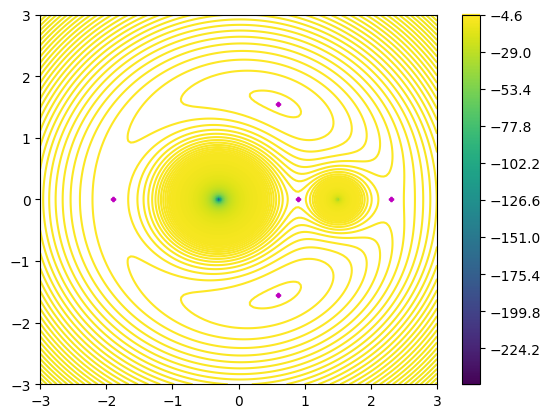

In [ ]:
# create a figure, axis and plot element
fig = plt.figure()
axis = plt.axes(xlim =(-3, 3), ylim =(-3, 3))
mass1, = axis.plot(body1.pos[0], body1.pos[1], 'ro', markersize=20)
mass2, = axis.plot(body2.pos[0], body2.pos[1], 'bo', markersize=4)
#mass3, = axis.plot(body3.pos[0], body3.pos[1], 'mo', markersize=3)
# com, = axis.plot(COM[0], COM[1], 'gP')
l1, = axis.plot(0.6, 1.55, 'mP', markersize=3)
l2, = axis.plot(0.6,-1.55, 'mP', markersize=3)
l3, = axis.plot(0.9, 0, 'mP', markersize=3)
l4, = axis.plot(2.3, 0, 'mP', markersize=3)
l5, = axis.plot(-1.9, 0, 'mP', markersize=3)

# def plotContour():
x_points = np.linspace(-3, 3, 150)
y_points = np.linspace(-3, 3, 150)
X, Y = np.meshgrid(x_points, y_points)

U = -(G*body1.mass/np.sqrt((X-body1.pos[0])**2 + (Y-body1.pos[1])**2) + G*body2.mass/np.sqrt((X-body2.pos[0])**2 + (Y-body2.pos[1])**2) + 0.5*(ohm**2)*(X**2 + Y**2) )

contour = axis.contour(X, Y, U, levels=1500)

plt.colorbar(contour)
plt.show()

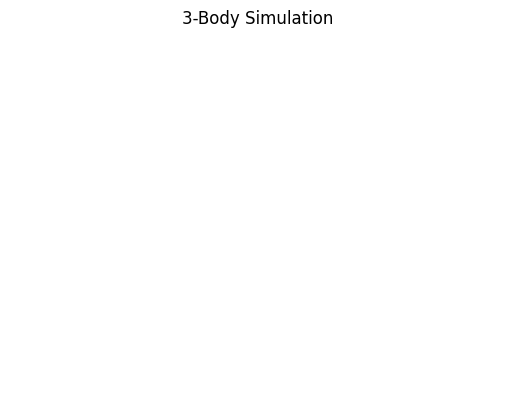

In [ ]:
# initialization function
def init():
  # creating an empty plot/frame
  mass1.set_data([body1.pos[0]], [body1.pos[1]])
  mass2.set_data([body2.pos[0]], [body2.pos[1]])
  mass3.set_data([body3.pos[0]], [body3.pos[1]])
  return mass1, mass2, mass3,

# lists to store x and y axis points
# x_data, y_data=[], []

#animate function
def animate(i):
    # t is a parameter
    t = i*dt

    f1 = findForceOn(body1)
    f2 = findForceOn(body2)
    f3 = findForceOn(body3)

    body1.updateAcc(f1)
    body2.updateAcc(f2)
    body3.updateAcc(f3)

    body1.updateVel()
    body2.updateVel()
    body3.updateVel()

    body1.updatePos()
    body2.updatePos()
    body3.updatePos()

    # set/update the x and y axes data
    mass1.set_data([body1.pos[0]], [body1.pos[1]])
    mass2.set_data([body2.pos[0]], [body2.pos[1]])
    mass3.set_data([body3.pos[0]], [body3.pos[1]])
    COM = getCOM(bodies)
    com.set_data([COM[0]], [COM[1]])

    #contour = axis.contour(X, Y, U, levels=500)

    # return dot object
    return mass1, mass2, mass3, com

# setting a title for the plot
plt.title('3-Body Simulation')
# hiding the axis details
plt.axis('off')

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=10, blit=False)

# save the animation as mp4 video file
anim.save('3bodysim-red.mp4', writer = 'ffmpeg', fps = 50)

plt.show()